## Семинар 15. Логистическая регрессия.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('Diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
X = data.drop(['Outcome'], 1)
y = data['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = LogisticRegression()
#По умолчанию penalty='l2' (L2 регуляризация), C=1 (C = 1/alpha - параметр регуляризации)

In [8]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model.classes_

array([0, 1])

In [10]:
y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)
y_pred_proba_test[:5]

array([[0.4775284 , 0.5224716 ],
       [0.78021541, 0.21978459],
       [0.53579699, 0.46420301],
       [0.83552372, 0.16447628],
       [0.86047363, 0.13952637]])

In [11]:
y_pred_proba_test[:, 0] #все вероятности класса 0 на test

array([0.4775284 , 0.78021541, 0.53579699, 0.83552372, 0.86047363,
       0.90266563, 0.86193004, 0.6588475 , 0.90413393, 0.6779135 ,
       0.8675377 , 0.68339426, 0.21058366, 0.66927423, 0.83841947,
       0.37003204, 0.38725708, 0.9257066 , 0.87101769, 0.17205482,
       0.67142141, 0.51650736, 0.68646761, 0.6718989 , 0.75714744,
       0.40865228, 0.7186547 , 0.9750675 , 0.31067097, 0.24710182,
       0.70833044, 0.91226987, 0.86359957, 0.83671319, 0.59208244,
       0.81605624, 0.71635906, 0.69120198, 0.36715397, 0.89525739,
       0.61266553, 0.66672214, 0.67082216, 0.65213082, 0.6236338 ,
       0.89098787, 0.57973564, 0.84535811, 0.53851532, 0.70336981,
       0.85050895, 0.26481702, 0.75197739, 0.69834812, 0.64602907,
       0.90251354, 0.88996232, 0.70213659, 0.78106406, 0.90651299,
       0.84274242, 0.8567257 , 0.90853816, 0.58296602, 0.8505068 ,
       0.56736287, 0.46670733, 0.70253362, 0.81070668, 0.51488886,
       0.41417942, 0.79289293, 0.52665421, 0.54125627, 0.75226

In [ ]:
y_pred_proba_test[:, 1] #все вероятности класса 1 на test

In [12]:
y_pred_train = model.predict(X_train) #по умолчанию порог = 0.5
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [14]:
def predict_with_cutoff(y_pred_proba, cutoff):
    return np.array(list(map(lambda x: 1 if x > cutoff else 0, y_pred_proba[:, 1])))
#np.fromiter(map(lambda x: 1 if x > cutoff else 0, y_pred_proba[:, 1]), np.int)

In [13]:
#type(map(lambda x: 1 if x > 0.35 else 0, y_pred_proba_train[:, 1]))

map

In [15]:
y_pred_train_cutoff = predict_with_cutoff(y_pred_proba_train, 0.35)
y_pred_test_cutoff = predict_with_cutoff(y_pred_proba_test, 0.35)

#### Матрица ошибок

In [16]:
conf_mat = confusion_matrix(y_train, y_pred_train_cutoff)
conf_mat = pd.DataFrame(conf_mat, index = model.classes_, columns = model.classes_).T
print("Train: ")
conf_mat

Train: 


,0,1
0,273,49
1,83,132


In [17]:
conf_mat = confusion_matrix(y_test, y_pred_test_cutoff)
conf_mat = pd.DataFrame(conf_mat, index = model.classes_, columns = model.classes_).T
print("Test: ")
conf_mat

Test: 


,0,1
0,115,29
1,29,58


#### Accuracy, precision, recall, F1-score

In [18]:
report = classification_report(y_train, y_pred_train_cutoff, target_names=['0', '1'])
print("Train:")
print(report)
#support: распределение 0 и 1 на y_train

Train:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       356
           1       0.61      0.73      0.67       181

    accuracy                           0.75       537
   macro avg       0.73      0.75      0.74       537
weighted avg       0.77      0.75      0.76       537



In [19]:
report = classification_report(y_test, y_pred_test_cutoff, target_names=['0', '1'])
print("Test:")
print(report)
#support: распределение 0 и 1 на y_test

Test:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       144
           1       0.67      0.67      0.67        87

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



#### AUC-ROC

In [20]:
score = roc_auc_score(y_train, y_pred_proba_train[:, 1])
print("Train: ", score)
score = roc_auc_score(y_test, y_pred_proba_test[:, 1])
print("Test: ", score)
#берем именно y_pred_proba_train[:, 1] : "... y_score is supposed to be the score of the class with greater label."

Train:  0.8383977900552487
Test:  0.8226372924648787


Train: 


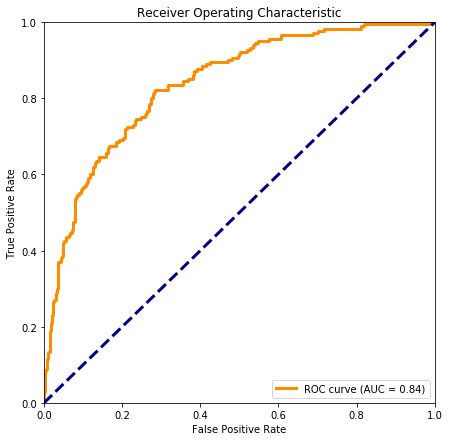

In [21]:
fpr, tpr, threshold = roc_curve(y_train, y_pred_proba_train[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (7,7))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (AUC = %0.2f)' % roc_auc) #lw - толщина линии
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--') #прямая y=x
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
print("Train: ")
plt.show()

Test: 


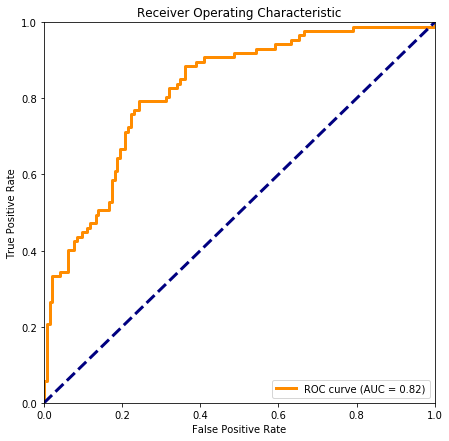

In [22]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba_test[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (7,7))
plt.plot(fpr, tpr, color='darkorange', lw=3, label='ROC curve (AUC = %0.2f)' % roc_auc) #lw - толщина линии
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
print("Test: ")
plt.show()